In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = (x_train / 255).reshape(60000, 28, 28, 1)
x_test = (x_test / 255).reshape(10000, 28, 28, 1)

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    #tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #tf.keras.layers.Dropout (0.25),
    tf.keras.layers.Dense(10, activation='softmax'),
    ])

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print (model.summary())

early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2) 

history = model.fit(x_train, y_train, epochs = 20, shuffle=True, validation_split=0.000, callbacks=[early_stopping_callbacks]) #batch_size= 6000, 
model.evaluate(x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_69 (Dense)             (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
_________________________________________________________________
None

[0.2587348137915134, 0.911]

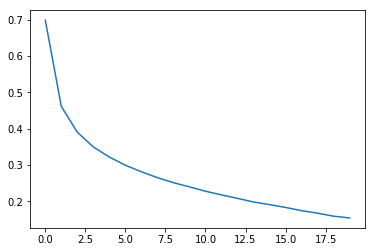

In [65]:
plt.plot(history.history['loss'])

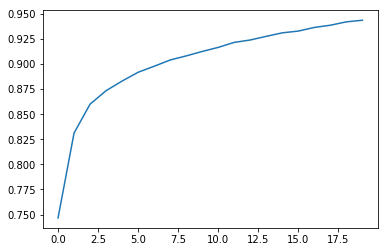

In [66]:
plt.plot(history.history['acc'])

EXERCISES
===

 - Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
 - Remove the final Convolution. What impact will this have on accuracy or training time?
 - How about adding more Convolutions? What impact do you think this will have? Experiment with it.
 - Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
 - In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!